In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Now Explicit ADR

In [25]:
def _AD_matrix(cfld, cfla, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
#     print(dx)
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f


## Let's do this with linear chemistry at first and constant advection

In [101]:

def _ADR_matrix(cfld, cfla, kappa, PHI, NX, Nsteps):
    T = np.zeros([NX,NX])
    T[0][0] = 1
    T[-1][-1] = 1
    
    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld + kappa

    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][1:-1] = np.exp(-.5*np.power((x[1:-1]-sizex/2)/sigma,2))
    f[0,0] = PHI
    f[0,-1] = PHI
    
    return T,f

def _ADR_matrix_PBC(cfld, cfla, kappa, PHI, NX, Nsteps):

    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld + kappa

    T = np.zeros([NX,NX])
    T[0][0] = c
    T[-1][-1] = c
    
    T[0][1] = b
    T[-1][-2] = a
    
    T[0][-1] = a
    T[-1][0] = b
    
    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][:] = np.exp(-.5*np.power((x[:]-sizex/2)/sigma,2))

    print(T)
    return T,f
def ADR_with_history(cfld, cfla, kappa, PHI, NX, Nsteps):
    T,f = _ADR_matrix_PBC(cfld, cfla, kappa, PHI, NX, Nsteps)
    dx    = 1/float(NX-1)
    x = np.linspace(0,1,NX)

    for t in range(1,Nsteps):
        f[t] = np.dot(T,f[t-1])
    return x, f
def plot_10_percent(x,f):
    lw = 2
    
    stepsize = np.floor(f.shape[0]/10)
    plt.figure(figsize = (9,9))
    # plt.plot(x,f[0],'k--',alpha = 1, lw = lw+.5,label = 0)
    for step in np.arange(0,f.shape[0],stepsize):
        plt.plot(x,f[step],'k',alpha = .9*step/f.shape[0]+.1, lw = lw, label = step)

#     plt.ylim([0,1])
    plt.xlabel('x')
    plt.legend(fontsize = 14)
    plt.show()
# %time diffusion_fast(.4,1,100,34000)
def calc_H(f,dx):
    tot = 0
    for i in f.flatten():
        tot += i*i*dx
    return tot
def calc_M0(f,dx):
    tot =0
    for i in f.flatten():
        tot += i*dx
    return tot
def calc_M1(f,x,dx):
    return np.dot(f,x*dx)

def norm(x):
    np.array(x)
    x/=np.max(x)
    return x
def diag(x,f):
    dx = x[1]-x[0]
    list_H = []
    list_M0 = []
    list_M1 = []
    for i in range(len(f)-1):
        list_H.append(calc_H(f[i],dx))
        list_M0.append(calc_M0(f[i],dx))
        list_M1.append(calc_M1(f[i],x,dx))
    plt.figure(figsize =(9,9))
    plt.plot(list(range(len(f)-1)),norm(list_H),'k',lw=5 , label = r"$H_2$")
    plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
#     plt.plot(list(range(len(f)-1)),norm(list_M1),'--',lw=5 , label = r"$M_1$")
#     print(np.array(list_M1)-np.array(list_M0))
    print(norm(list_M1))
    fs = 20
    plt.ylabel("Normalized Value",fontsize =fs)
    plt.legend(fontsize = fs)

    plt.xlabel("Time step",fontsize = fs)
    plt.show()


In [115]:
dif = 0.5
vel = 0.6
sizeX = 1
Nsteps = 5000
NX = 100
dx = sizeX/(NX-1)
x = np.linspace(0,sizeX,NX)
f = np.zeros([Nsteps, NX])
sigma = .1*sizeX
f[0][:] = np.exp(-.5*np.power((x[:]-sizeX/2)/sigma,2))
logis_a = 0
logis_b = 0
dt_dif  = dx*dx/dif
dt_adv  = dx/vel 
if logis_a != 0:
    dt_chem = 1/logis_a
dt = .25*np.min([dt_dif, dt_adv, dt_chem])

alpha = vel*dt/dx
delta = dif*dt/(dx*dx)
# with logistic kappa will be constantly changing
#kappa = 
print(dt)



5.10152025304e-05


First as a simple loop

/home/ian/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


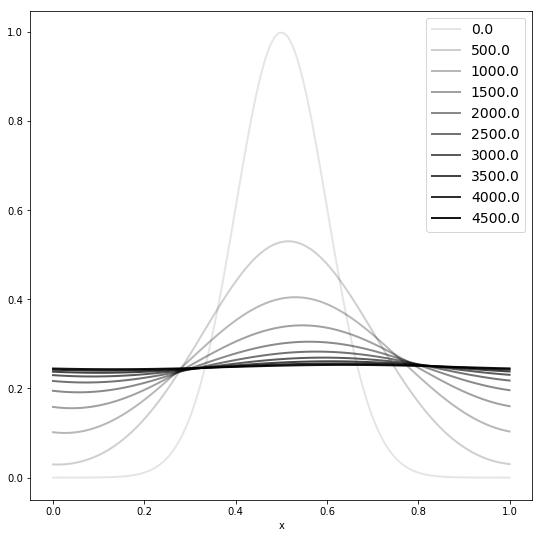

In [116]:
a = delta + .5*alpha
b = delta -.5*alpha
c = 1-a-b

T_base = np.zeros([NX,NX])
T_base[0][0] = c
T_base[-1][-1] = c

T_base[0][1] = b
T_base[-1][-2] = a

T_base[0][-1] = a
T_base[-1][0] = b

for n in range(1,NX-1):
    T_base[n][n-1]=a
    T_base[n][n]=c
    T_base[n][n+1]=b
    

chem = (logis_a-logis_b)*f[0]*dt
T = T_base +chem*np.identity(NX)
for it in range(1,Nsteps):
    chem = (logis_a-logis_b)*f[it-1]*dt
    T = T_base + chem*np.identity(NX)
    f[it] = np.dot(T,f[it-1])
plot_10_percent(x,f)

[  1.11022302e-16   0.00000000e+00   1.11022302e-16 ...,  -5.55111512e-17
   5.55111512e-17  -5.55111512e-17]
[0.17679472026508836, 0.17634747850417712, 0.1759036166564536, 0.17546309232906576, 0.17502586387045468]
[ 0.96483348  0.96489254  0.96495161 ...,  0.96783807  0.96783552
  0.96783296]


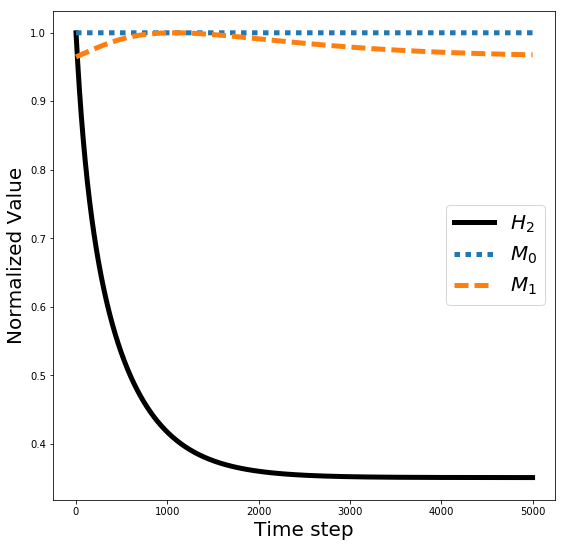

In [126]:
def calc_H(f,dx):
    tot = 0
    for i in f.flatten():
        tot += i*i*dx
    return tot
def calc_M0(f,dx):
    tot =0
    for i in f.flatten():
        tot += i*dx
    return tot
def calc_M1(f,x,dx):
    tot = 0
    for i,v in enumerate(f.flatten()):
        tot += v*x[i]*dx
    return tot #np.dot(f,x*dx)

def norm(x):
    np.array(x)
    x/=np.max(x)
    return x
def diag(x,f):
    dx = x[1]-x[0]
    list_H = []
    list_M0 = []
    list_M1 = []
    for i in range(len(f)-1):
        list_H.append(calc_H(f[i],dx))
        list_M0.append(calc_M0(f[i],dx))
        list_M1.append(calc_M1(f[i],x,dx))
    M0_prime = np.diff(list_M0)
    print(M0_prime)
    print(list_H[1:6])
    plt.figure(figsize =(9,9))
    plt.plot(list(range(len(f)-1)),norm(list_H),'k',lw=5 , label = r"$H_2$")
    plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
#     plt.plot(list(range(len(f)-2)),norm(M0_prime),label = 'M0_prime')
    plt.plot(list(range(len(f)-1)),norm(list_M1),'--',lw=5 , label = r"$M_1$")
#     print(np.array(list_M1)-np.array(list_M0))
    print(norm(list_M1))
    fs = 20
    plt.ylabel("Normalized Value",fontsize =fs)
    plt.legend(fontsize = fs)

    plt.xlabel("Time step",fontsize = fs)
    plt.show()
    return list(range(len(f)-1)), list_M0, M0_prime, list_M1, list_H
    
out = diag(x,f)

In [124]:
tot = 0
for i in range(NX):
    tot += f[0][i]*x[i]*dx
print(tot*4)

0.501325436487


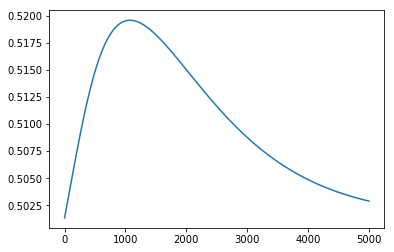

In [128]:
plt.plot(out[0],np.array(out[3])*4)
# plt.plot(out[0][0:-1],out[2])
# plt.plot(out[0],out[-1])

/home/ian/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


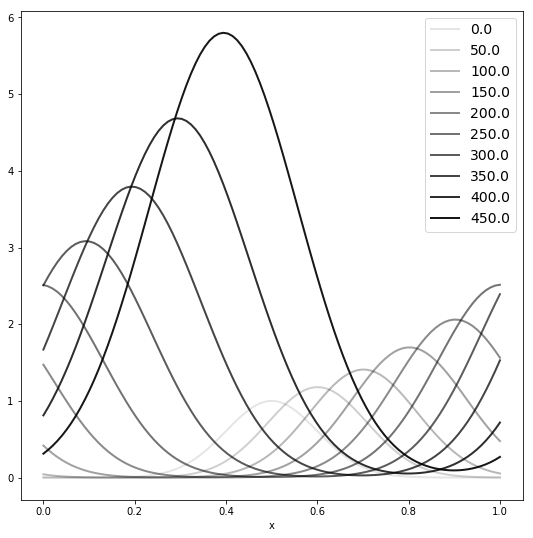

In [43]:
x,f = ADR_with_history(.2, .2, .005, 1,100, 500)
print(f.shape)
plot_10_percent(x,f)

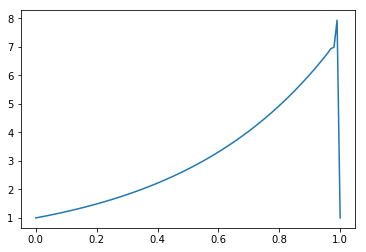

In [22]:
plt.plot(x,f[450])